# A MOVIE RECOMMENDATION SYSTEM USING MOVIELENS DATA
***

## Project Overview

This project focuses on analyzing movie ratings from the MovieLens dataset to provide tailored movie recommendations. It combines collaborative filtering and content-based filtering, to identify the top 5 movies most suited to a user's interests. This dual approach enhances the recommendation accuracy by integrating both user-driven insights and movie-specific characteristics, creating a robust, personalized viewing experience.

## BUSINESS UNDERSTANDING
***

In today’s digital age, online streaming platforms such as Netflix, Showmax,HBO,provide a vast library of movies across various genres, which users can stream on devices like smartphones, tablets, smart TVs, and computers. These platforms generate vast amounts of data on user interactions, including viewing habits, preferences, and ratings. However, the challenge lies in leveraging this data to enhance user engagement by providing personalized movie recommendations that align with individual tastes. 

Personalization has a proven impact on engagement; for example, [75% of what people watch on Netflix](https://litslink.com/blog/all-about-netflix-artificial-intelligence-the-truth-behind-personalized-content) comes from its personalized recommendations, highlighting the importance of robust recommendation algorithms in guiding users toward their next favorite show or movie. The goal of this project is to improve user satisfaction and retention by suggesting the top 5 movies a user is likely to enjoy, utilizing a blend of collaborative and content-based filtering.

## PROBLEM STATEMENT
***

With the increasing volume of movies available on streaming platforms, users often experience choice overload, making it difficult to discover content that matches their preferences. This reduces user satisfaction and engagement, negatively impacting retention rates for content providers. The challenge is to develop a personalized recommendation system that can accurately predict and suggest movies tailored to individual users' tastes. 

## OBJECTIVES 
***

The objectives of this analysis are as listed below:

1. To identify the top 10 most popular genres based on user ratings.
2. To Identify the top 10 Genres with the highest ratings
3. To Identify the distribution of movie ratings per user
4. To identify the trend of movies' production by decade
5. To examine the number of ratings per movie
6. To Identify the most popular movies
7. To identify if there is a relationship between movie genres and ratings.
8. To examine user-generated tags to identify popular keywords associated with movie themes.
9. To build a recommendation system that suggests the top 5 rated movies to a user.

## SUCCESS METRICS
***
The success metric of this analysis is to identify the best-performing model using GridSearchCV, with the least Root Mean Squared Error (RMSE). This selected model will then serve as the foundation for building a recommendation system that prompts users to rate movies based on their preferred genres and recommends five related movies by combining collaborative and content-based filtering approaches.

## DATA UNDERSTANDING
***

The [dataset](https://grouplens.org/datasets/movielens/latest/) for the analysis is from the GroupLens research lab at the University of Minnesota. This dataset describes 5-star rating and free-text tagging activity from, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018. It entails different csv files. In this case, our analysis entailed utilizing 3 csv files namely, `movies.csv`, `ratings.csv`  and `tags.csv`.The details of each csv files are further explained below.

**1. movieId** is an identifier for movies used.

**2. Title** represents the different movie titles and their release year.

**3. Genres** entails the different genres for the movies.

**4. userId** is an identifier for each user who rated a movie.

**5. Rating** represents the different user ratings for each movie. They were made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

**6. Tags** are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

**7. Timestamps** represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [1]:
#Importing the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise.model_selection import cross_validate,GridSearchCV
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline,SVD
from scipy.stats import f_oneway
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from surprise import SVD,Reader, Dataset
from surprise.prediction_algorithms.knns import KNNBasic
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import Functions
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Us

True

## LOADING DATA 
***

Loading data for this section involved using functions which were created in the .py file of this project folder.

In [2]:
#loading the csv files
from Functions import load_data

#Defining the csv file paths 
movie_file_path = "Data/movies.csv"
rating_file_path= "Data/ratings.csv"
tags_file_path= "Data/tags.csv"

In [3]:
#Importing function for loading data
from Functions import explore_data

#Loading and inspecting the movie csv file
movie_df = pd.read_csv(movie_file_path)  
explore_data(movie_df)

displaying the first 5 rows 
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   

Shape of the dataset:  (9742, 3) 

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memo

The above function successfully loaded the movie CSV file, displaying the first 5 rows of the DataFrame, summary statistics, the column data types, the percentage of null values, and the shape of the DataFrame.

From the output, the DataFrame had 0% null values, indicating that it contains 9,472 movies along with their associated genres. Additionally, the shape of the DataFrame confirms it consists of 3 columns, all of which have the correct data types.

In [4]:
#Loading and inspecting the movie ratings csv file
rating_df = pd.read_csv(rating_file_path)  
explore_data(rating_df)

displaying the first 5 rows 
    userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931 

Shape of the dataset:  (100836, 4) 

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Statistical summary:
               userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+0

The function successfully loaded the rating CSV file, which includes various movies and their ratings. It also displayed the first 5 rows of the DataFrame, summary statistics, column data types, the percentage of null values, and the shape of the DataFrame.

From the output, the DataFrame has 0% null values, and also contains 100,836 movie ratings. The shape of the DataFrame confirms it consists of 4 columns, all of which have the correct data types. According to the summary statistics, the minimum rating is 0.5, the maximum rating is 5, and the average rating is 3.5.

In [5]:
#Loading and inspecting movie tags csv
tags_df = pd.read_csv(tags_file_path)  
explore_data(tags_df)

displaying the first 5 rows 
    userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200 



Shape of the dataset:  (3683, 4) 

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


Statistical summary:
             userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158.472553   43490.558803  1.721025e+08
min       2.000000       1.000000  1.137179e+09
25%     424.000000    1262.500000  1.137521e+09
50%     474.000000    4454.000000  1.269833e+09
75%     477.000000   39263.000000  1.498457e+09
max     610.000000  193565.000000  1.537099e+09 

percentage of nulls 
 userId       0.0
movieId      0.0
tag          0.0
timestamp    0.0
dtype: f

The function successfully loaded the tags CSV file, which entailed the different tags that users provided as themes associated to the movies they watched. It also displayed the first 5 rows of the DataFrame, summary statistics, column data types, the percentage of null values, and the shape of the DataFrame.

From the output, the DataFrame has 0% null values, and also contains 3683 movie tags. Additionally, the shape of the DataFrame confirms it consists of 3 columns, all of which have the correct data types.

## DATA CLEANING
***

This section will involve checking the following about the dataset.
- Accuracy
- Validity
- Completeness
- Uniformity

**1. Accuracy**

This ensures the data is correct and free from errors or inconsistencies.

**Checking for duplicates**

In [6]:
#Check for duplicates
from Functions import check_and_remove_duplicates
# Checking and removing duplicates in movies dataset
movie_df = check_and_remove_duplicates(movie_df)

# Checking and removing duplicates in ratings dataset
rating_df = check_and_remove_duplicates(rating_df)

# Checking and removing duplicates in tags dataset
tags_df = check_and_remove_duplicates(tags_df)


Number of duplicate rows: 0
No duplicates found.
Number of duplicate rows: 0
No duplicates found.
Number of duplicate rows: 0
No duplicates found.


**Interpretation**

After running the check on all three datasets (movies, ratings, and tags), it's clear that no duplicate rows were found in any of the datasets. Therefore, the data is clean in this regard and requires no further action to remove duplicates, ensuring the integrity of the subsequent analysis.

**Checking for outliers**

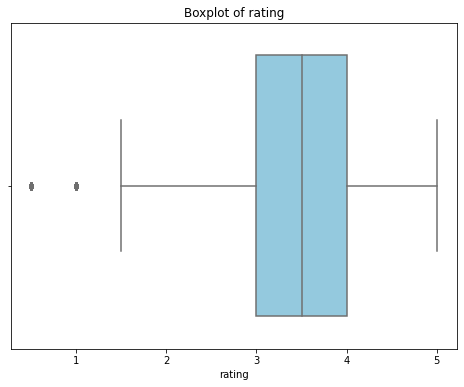

In [7]:
#Checking for outliers in the 'rating' column of the ratings dataset
from Functions import visualize_outliers_with_boxplot
visualize_outliers_with_boxplot(rating_df, 'rating')

**Interpretation**

The boxplot of the rating column shows that most ratings fall between 3.0 and 4.5, indicating a general preference for higher-rated movies, with a few low outliers reflecting strong dislikes.These outliers are retained because they provide meaningful insights into user behavior, particularly reflecting strong negative opinions about certain movies. Low ratings are critical for understanding user dislikes, which is essential for preventing the recommendation system from suggesting unsuitable movies. By maintaining these outliers, the recommendation system can better capture the diversity of user sentiments, leading to more robust and personalized recommendations that accurately represent the full spectrum of user preferences.


**2. Validity**

This confirms the data adheres to predefined rules or constraints.

In [8]:
#Check for consistency in datatypes
#Converting Timestamp into DATE format

#Converting the timestamp into date format
rating_df['timestamp'] = pd.to_datetime(rating_df['timestamp'])
tags_df['timestamp']= pd.to_datetime(tags_df['timestamp'])  


#Extracting the date

rating_df['timestamp'] = rating_df['timestamp'].dt.date
tags_df['timestamp']=tags_df['timestamp'].dt.date
tags_df['timestamp']
rating_df['timestamp']

0         1970-01-01
1         1970-01-01
2         1970-01-01
3         1970-01-01
4         1970-01-01
             ...    
100831    1970-01-01
100832    1970-01-01
100833    1970-01-01
100834    1970-01-01
100835    1970-01-01
Name: timestamp, Length: 100836, dtype: object

In [ ]:
#Checking for unique values in the date column for the rating csv
rating_df['timestamp'].value_counts()

1970-01-01    100836
Name: timestamp, dtype: int64

In [ ]:
#Checking for unique values in the date column for the tags csv
tags_df['timestamp'].value_counts()

1970-01-01    3683
Name: timestamp, dtype: int64

Since the timestamp column only indicates the time when users rated a movie and all values fall within the same year (1970), it does not add valuable information to our analysis. Therefore, we will drop it from the dataset to streamline our data and focus on more relevant features.

In [11]:
#Drop irrelevant columns
#Dropping the timestamp column
rating_df=rating_df.drop('timestamp',axis=1)
tags_df=tags_df.drop('timestamp',axis=1)

In [12]:
#Confirm the column names after dropping timestamp
rating_df.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [13]:
#Confirm the column names after dropping the timestamp column
tags_df.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [14]:
#Checking for column names
""" The column names are consistent in naming for all files. They are also all in lower case."""

' The column names are consistent in naming for all files. They are also all in lower case.'

**3. Completeness**

This section checks whether all required data is present and no critical information is missing.

In [15]:
#Impute missing values
"""
The data was confirmed to have no missing values by calculating the percentage of missing values in each CSV file,
all of which showed 0%. As a result, no imputation was required.
"""

'\nThe data was confirmed to have no missing values by calculating the percentage of missing values in each CSV file,\nall of which showed 0%. As a result, no imputation was required.\n'

**4. Consistency/Uniformity**

Ensures that data is consistently formatted and standardized across the dataset.

In [16]:
#Column names capitalization
"""
All the columns displayed consistency in their naming, were all in lower case and had the correct datatypes.
"""

'\nAll the columns displayed consistency in their naming, were all in lower case and had the correct datatypes.\n'

In [17]:
#Checking if ratings lie within the same range
"""
All the movie ratings were in the same range, ranging from 0.5 to 5 star rating, with no missing value as well.
"""

'\nAll the movie ratings were in the same range, ranging from 0.5 to 5 star rating, with no missing value as well.\n'

In [18]:
# Splitting the movie titles from the years
movie_df["Release_year"] = movie_df["title"].apply( lambda x: x[-5:-1] if x[-5:-1].isdigit() else "0000")
movie_df["Release_year"] = movie_df["Release_year"].astype("int64")
movie_df["Release_year"]

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9737    2017
9738    2017
9739    2017
9740    2018
9741    1991
Name: Release_year, Length: 9742, dtype: int64

In [19]:
#Checking for unique genres
movie_df["genres"].unique()[:40]

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

Most movies seem to be a **combination of multiple genres** hence why there are so so many unique combinations.

Let's seperate these combinations into individual genres and get more granular data

In [20]:
# seperate the combinations into individual genres by removing the "," seperators
movie_df['genres'] = movie_df['genres'].str.split('|')

# create a new Exploded dataframe with the list of genres into individual rows
movie_df= movie_df.explode('genres').reset_index(drop=True)


movie_df.head()

,movieId,title,genres,Release_year
0,1,Toy Story (1995),Adventure,1995
1,1,Toy Story (1995),Animation,1995
2,1,Toy Story (1995),Children,1995
3,1,Toy Story (1995),Comedy,1995
4,1,Toy Story (1995),Fantasy,1995


The genres column is now made up of lists of individual genres.

**Merging the movie_df with rating_df** 

In [21]:
#Merging the movie_df with rating_df to identify different ratings per genre
merged_df=pd.merge(rating_df,movie_df, on='movieId')
merged_df

,userId,movieId,rating,title,genres,Release_year
0,1,1,4.0,Toy Story (1995),Adventure,1995
1,1,1,4.0,Toy Story (1995),Animation,1995
2,1,1,4.0,Toy Story (1995),Children,1995
3,1,1,4.0,Toy Story (1995),Comedy,1995
4,1,1,4.0,Toy Story (1995),Fantasy,1995
...,...,...,...,...,...,...
274475,610,160836,3.0,Hazard (2005),Drama,2005
274476,610,160836,3.0,Hazard (2005),Thriller,2005
274477,610,163937,3.5,Blair Witch (2016),Horror,2016
274478,610,163937,3.5,Blair Witch (2016),Thriller,2016


In [22]:
#Importing the loading function to inspect the details of the merged dataset
explore_data(merged_df)

displaying the first 5 rows 
    userId  movieId  rating             title     genres  Release_year
0       1        1     4.0  Toy Story (1995)  Adventure          1995
1       1        1     4.0  Toy Story (1995)  Animation          1995
2       1        1     4.0  Toy Story (1995)   Children          1995
3       1        1     4.0  Toy Story (1995)     Comedy          1995
4       1        1     4.0  Toy Story (1995)    Fantasy          1995 

Shape of the dataset:  (274480, 6) 

Dataset info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274480 entries, 0 to 274479
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   userId        274480 non-null  int64  
 1   movieId       274480 non-null  int64  
 2   rating        274480 non-null  float64
 3   title         274480 non-null  object 
 4   genres        274480 non-null  object 
 5   Release_year  274480 non-null  int64  
dtypes: float64(1), int64(3), obje

The function successfully loaded the merged CSV files, which included the movie_df and the rating_df. It displayed the first 5 rows of the merged DataFrame, summary statistics, column data types, the percentage of null values, and the shape of the DataFrame.

From the output, the DataFrame has 0% null values, and also contains 274480 movie ratings. The shape of the DataFrame confirms it consists of 7 columns, all of which have the correct data types. According to the summary statistics, the minimum rating is 0.5, the maximum rating is 5, and the average rating is 3.5. The merged_df further captures the release year for each movie.

**Checking for the Distribution of the data**

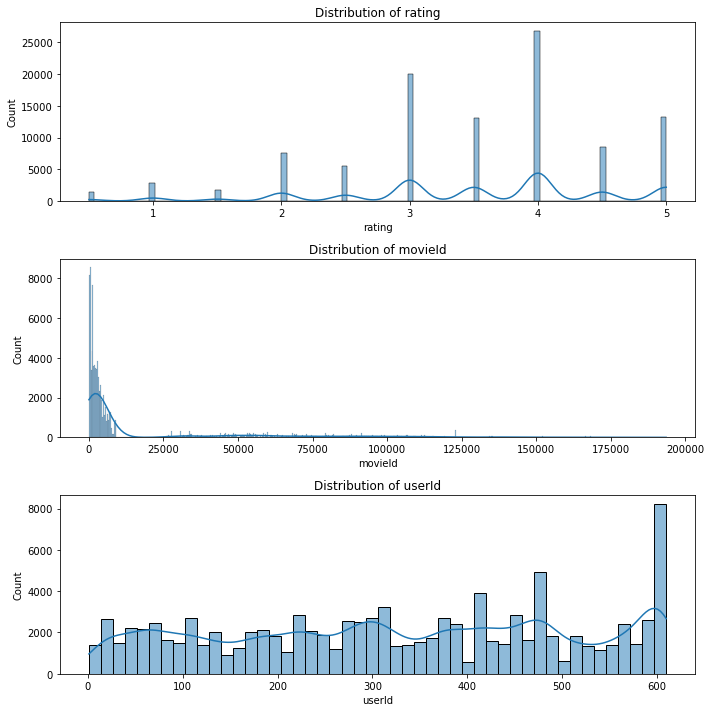

In [23]:
#Selecting the numerical columns from the merged df
numerical_cols_df = merged_df[["rating", "movieId", "userId"]]

# Creating  subplots
fig, axes = plt.subplots(3, figsize=(10,10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Looping through each column and plotting in the respective subplot
for i, col in enumerate(numerical_cols_df):
    sns.histplot(x=rating_df[col], ax=axes[i], kde=True)  
    axes[i].set_title(f'Distribution of {col}')  

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**Interpretation**

The analysis reveals that movie ratings are generally skewed towards higher values, with most users giving positive feedback. Although there are a few instances of very low ratings, these are exceptions rather than the norm. 

Regarding movie IDs, the distribution shows a heavy right-skew, indicating that while many movies receive few ratings, a smaller set of movies attracts a large number of ratings. 

Lastly, the distribution of user IDs is relatively uniform, suggesting that a moderate number of users contribute a similar amount of ratings, although some users may rate more frequently than others.

To address the skewness in the data, we will apply MinMax scaling during the modeling phase.Since we decided to retain the outliers in our analysis, MinMax scaling will normalize the data to a fixed range while preserving the relative relationships between the features, including the outliers.

## EXPLORATORY DATA ANALYSIS
***

**1. To identify the top 10 most popular genres based on the number of user ratings.**


In [24]:
# Group by genres and calculate the total number of ratings
genre_ratings = merged_df.groupby('genres').agg(
    Rating_Count=('rating', 'count')
).reset_index()

# Sort genres by the number of ratings and select the top 10
top_genres = genre_ratings.sort_values(by='Rating_Count', ascending=False).head(10)

# Display the top 10 genres
print(top_genres)

       genres  Rating_Count
8       Drama         41928
5      Comedy         39053
1      Action         30635
17   Thriller         26452
2   Adventure         24161
15    Romance         18124
16     Sci-Fi         17243
6       Crime         16681
9     Fantasy         11834
4    Children          9208


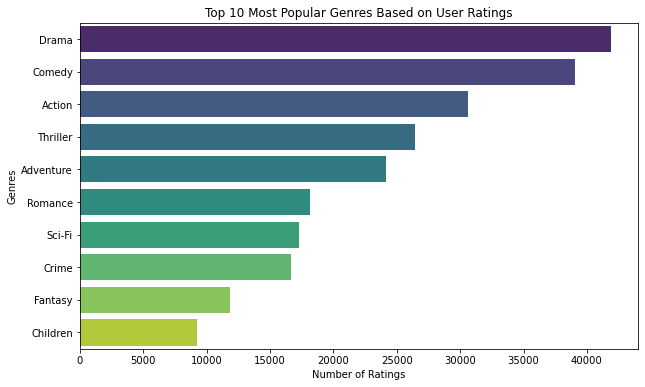

In [25]:
# Plotting the top 10 genres
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating_Count', y='genres', data=top_genres, palette='viridis')
plt.title('Top 10 Most Popular Genres Based on User Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Genres')
plt.show();

**Interpretation**

The graph displays the top 10 most-rated genres, with Drama having the highest number of user ratings, followed by Comedy and Action. This sheds light on the kind of genres which were highly watched by different users.

**2. To Identify the top 10 Genres with the highest ratings**

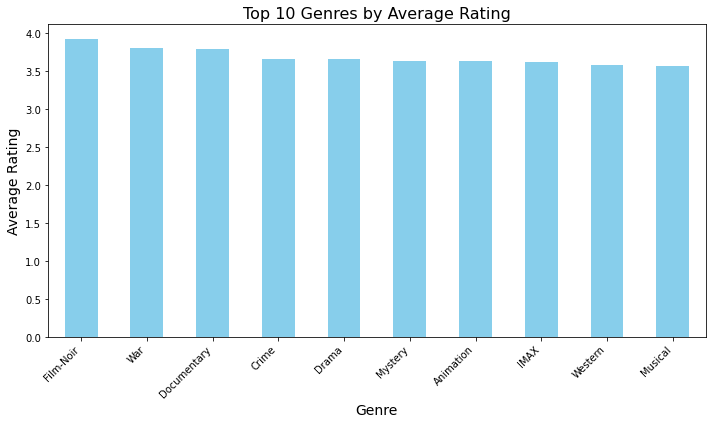

In [26]:
# Group by genre and calculate the average rating for each genre
top_10_genres_avg_rating =merged_df.groupby('genres')['rating'].mean().sort_values(ascending=False)

# Select the top 10 genres
top_10_genres = top_10_genres_avg_rating.head(10)

# Plotting the top 10 genres by average rating
plt.figure(figsize=(10,6))
top_10_genres.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Top 10 Genres by Average Rating', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

**Interpretation**

The graph presents the genres which were highly rated, with Film-Noir presenting to have the highest rating, followed by war then documentary.

**3. To Identify the distribution of movie ratings per user**

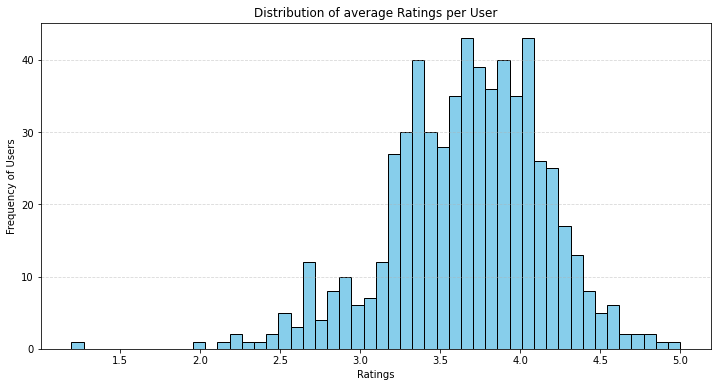

In [27]:
# Display the average ratings per user
ratings_per_user = merged_df.groupby('userId')['rating'].mean()

# Create a histogram of ratings per user
plt.figure(figsize=(12, 6))
ratings_per_user.plot(kind='hist', bins=50, color='skyblue', edgecolor='black') 

# Customize the plot
plt.title('Distribution of average Ratings per User')
plt.xlabel('Ratings')
plt.ylabel('Frequency of Users')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

**Interpretation**

The distribution indicates that the majority of movie ratings fall within the 2 to 4.5 star range, suggesting that most users tend to rate movies positively. However, the presence of a few low ratings below 2 stars highlights that there are still some users who express strong dissatisfaction, potentially due to varying expectations or specific negative experiences with certain films.

**4. To identify the trend of movies' production by decade**

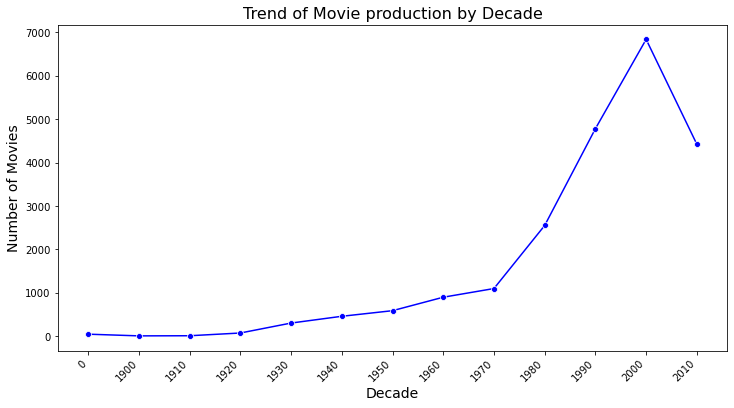

In [28]:
# Calculate the number of movies by decade
movie_df['Decade'] = (movie_df['Release_year'] // 10) * 10
movies_by_decade = movie_df.groupby('Decade').size()

# Extract decades and counts
decades = movies_by_decade.index
counts = movies_by_decade.values

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=decades.astype(str), y=counts, marker='o', color='blue') 

# Add labels and title
plt.title('Trend of Movie production by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14) 

# Customize x-axis ticks
plt.xticks(rotation=45, ha='right') 

# Show the plot
plt.show()

**Interpretation**

The graph presents that movie production remained slow in the 1900s, but saw a significant increase starting in the 1970s. This upward trajectory can be attributed to technological advancements, higher demand for films, and greater investment in the film industry. However, from the 2000s onward, production is seen to fluctuate, likely due to changes in market dynamics, including the rise of digital streaming platforms, evolving consumer preferences, and increased competition within the entertainment industry.

**5. To examine the number of ratings per movie**

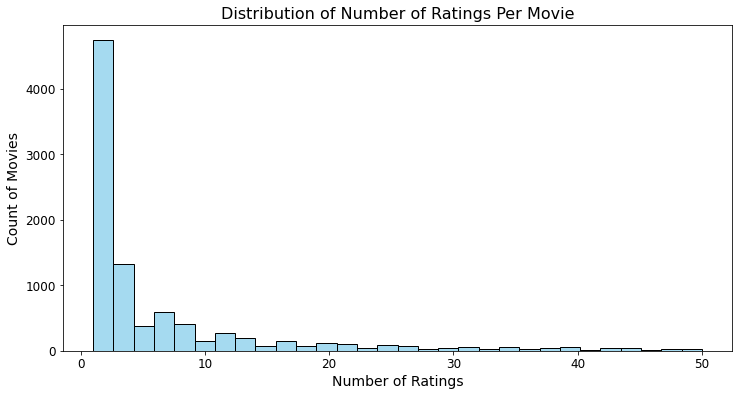

In [29]:
# Calculate the number of ratings per movie
ratings_per_movie = rating_df.groupby('movieId')['rating'].count()

# Set a threshold to focus on movies with a reasonable number of ratings
ratings_threshold = 50  

# Filter ratings per movie to focus on movies with less than the threshold
filtered_ratings = ratings_per_movie[ratings_per_movie <= ratings_threshold]

# Plot the histogram for the filtered data
plt.figure(figsize=(12, 6))
sns.histplot(filtered_ratings, bins=30, kde=False, color='skyblue')
plt.title('Distribution of Number of Ratings Per Movie', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Count of Movies', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Interpretation**

The number of ratings per movie appears to vary, with most movies receiving fewer than 10 ratings. This highlights that, despite a large number of users, only a small portion of movies were rated, indicating a high likelihood of data sparsity​.

**6. To Identify the most popular movies**

In [30]:
#Movie with the lowest rating
mean_ratings = rating_df.groupby('movieId')[['rating']].mean()
lowest_rated = mean_ratings['rating'].idxmin()
movie_df[movie_df['movieId']==lowest_rated]

,movieId,title,genres,Release_year,Decade
5862,3604,Gypsy (1962),Musical,1962,1960


Gypsy presents to be the movie with the lowest rating.

In [31]:
#Movie with the highest rating
highest_rated = mean_ratings['rating'].idxmax()
movie_df[movie_df['movieId'] == highest_rated]

,movieId,title,genres,Release_year,Decade
117,53,Lamerica (1994),Adventure,1994,1990
118,53,Lamerica (1994),Drama,1994,1990


Lamerica presents to be the movie with the highest rating, however, how many ratings does this movie have?

In [32]:
#Checking for the number of ratings for the Lamerica movie
rating_df[rating_df['movieId']==highest_rated]

,userId,movieId,rating
13368,85,53,5.0
96115,603,53,5.0


Although Lamerica was the highly rated movie, it had only 2 votes. A better approach for evaluating movie popularity is to do look at the Bayesian average.

Using raw ratings to rank the top 10 movies has limitations. Ratings alone don’t account for popularity, meaning a movie rated 5 by 10 voters might rank higher than one rated 4.9 by 10,000 voters. Similarly, fewer votes can lead to skewed results, as small sample sizes may not reflect true quality. Ratings tend to stabilize with more votes, offering a better representation of a movie's value. A more reliable metric is a **weighted rating**, which considers both the average rating and
and the number of votes, ensuring popular movies with high ratings rank appropriately over those with limited feedback. 

Therefore, in the below cell, we will apply Bayesian Average to assign weights to the different ratings in relation to the number of users who rated that movie.

## Bayesian Average
Bayesian Average is defined as:

 \begin{equation} \text Weighted Rating (\bf WR) = \left({{\bf v} \over {\bf v} + {\bf m}} \cdot R\right) + \left({{\bf m} \over {\bf v} + {\bf m}} \cdot C\right) \end{equation}

In the above equation,

v is the number of votes for the movie;

m is the minimum votes required to be listed in the chart;

R is the average rating of the movie.

In [33]:
#Calculating the average rating per movie
movie_stats = rating_df.groupby('movieId')['rating'].agg(['count', 'mean'])
movie_stats.head()

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429


In [34]:
#Applying bayesian average
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

print(f"Average number of ratings for a given movie: {C:.2f}")
print(f"Average rating for a given movie: {m:.2f}")

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return round(bayesian_avg, 3)

Average number of ratings for a given movie: 10.37
Average rating for a given movie: 3.26


Let's test our bayesian_avg function out on Lamerica:

In [35]:
#Testing bayesian function to the highly rated movie
lamerica = pd.Series([5, 5])
bayesian_avg(lamerica)

3.543

Lamerica's average Bayesian rating is 3.5.

Let's now apply bayesian_avg to all movies in our dataset.

In [36]:
#Applying Bayesian to the rest of the dataset
bayesian_avg_ratings = rating_df.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId', how='left')
movie_stats = movie_stats.merge(movie_df[['movieId', 'title']], on='movieId', how='left')
movie_stats

,movieId,count,mean,bayesian_avg,title
0,1,215,3.92093,3.891,Toy Story (1995)
1,1,215,3.92093,3.891,Toy Story (1995)
2,1,215,3.92093,3.891,Toy Story (1995)
3,1,215,3.92093,3.891,Toy Story (1995)
4,1,215,3.92093,3.891,Toy Story (1995)
...,...,...,...,...,...
22041,193583,1,3.50000,3.283,No Game No Life: Zero (2017)
22042,193585,1,3.50000,3.283,Flint (2017)
22043,193587,1,3.50000,3.283,Bungo Stray Dogs: Dead Apple (2018)
22044,193587,1,3.50000,3.283,Bungo Stray Dogs: Dead Apple (2018)


**Interpretation**

Based on the results, the Bayesian average provides a more balanced weighted average, minimizing bias towards the most-rated movies. While Toy Story had an average rating, it still stands out as the most-rated movie.

**7. To identify if there is a relationship between movie genres and ratings.**

Null Hypothesis (H₀): There is no relationship between movie genres and ratings.

Alternative Hypothesis (H₁): There is a significant relationship between movie genres and ratings.

In [37]:
genre_ratings = merged_df.groupby('genres')['rating'].apply(list)

# Perform one-way ANOVA (if assumptions are satisfied)
anova_result = f_oneway(*genre_ratings)
print('ANOVA result:', anova_result)

ANOVA result: F_onewayResult(statistic=176.87467559267563, pvalue=0.0)


**Interpretation**

F-statistic: 176.87 suggests a large difference between the mean ratings of the different genres.

Since the p-value is less than 0.05, we reject the null hypothesis. This means that there is a significant difference between the average ratings of at least some of the movie genres.

**Examining rating distributions by genre**

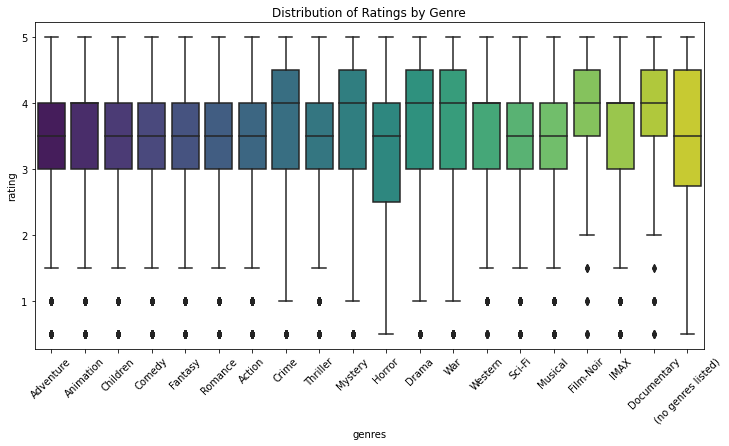

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='rating', data=merged_df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribution of Ratings by Genre')
plt.show()

**Interpretation**

Since the hypothesis testing highlighted that there is a significant difference in ratings by genre, the above box plots displays how these ratings vary by genre. With some genre ratings ranging from 3-4 star ratings , others 2.5 to 4.5 star ratings while others 3.5 to 4.5 star rating.This disparity reveals that, certain genres tend to receive more consistent ratings, while others experience greater variability, possibly reflecting differing audience expectations, preferences, or subjective opinions about the films within each genre.

**8. To examine user-generated tags to identify popular keywords associated with movie themes.**

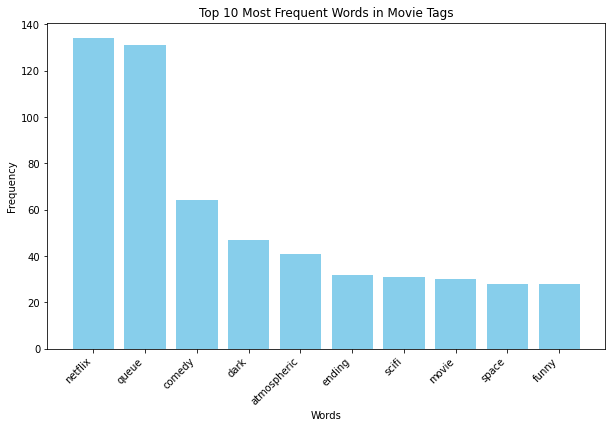

          word  count
0      netflix    134
1        queue    131
2       comedy     64
3         dark     47
4  atmospheric     41
5       ending     32
6        scifi     31
7        movie     30
8        space     28
9        funny     28


In [39]:
# Initialize lemmatizer and stop words list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# converting the tags to lowercase and removing non-alphabetic characters
tags_df['tag'] = tags_df['tag'].str.lower().apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Tokenize the tags, remove stop words, and apply lemmatization
tags_df['processed_tag'] = tags_df['tag'].apply(lambda x: [
    lemmatizer.lemmatize(word) for word in word_tokenize(x) if word not in stop_words
])

# Flatten the list of lists to get all words in one list
all_words = [word for tag in tags_df['processed_tag'] for word in tag]

# Get word frequency
word_counts = pd.Series(all_words).value_counts().reset_index()
word_counts.columns = ['word', 'count']

# Display the top 10 most frequent words
top_10_words = word_counts.head(10)

# Plotting the top 10 words
plt.figure(figsize=(10, 6))
plt.bar(top_10_words['word'], top_10_words['count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Movie Tags')
plt.show()

# Print the top 10 words
print(top_10_words)

**Interpretation**

The most frequent words highlights on users preferences.

- Netflix being on the top would highly imply that most movies were watched from netflix.

- Queue would indicate that most users usually tag or add movies to their watchlist.

- Word like Ending would suggest that most users are particularly focused on the conclusion of movies implying that a movie's ending is a key feature for most films.

- The word Movie appears commonly to reflect that most users tag films as 'movies' compared to the 'series' term. This implies that movie is frequently watched compared to series.

- Other words such as funny, dark and comedy highlights on the frequently watched themes, which would be key in offering a movie recommendation.

- Sci-Fi, space and Atmospheric implies that there is also a good chunk of users who are drawn to watching movies related to science fiction genres or movies with strong mood setting.

## MODELLING
***

**9. To build a recommendation system that suggests the top 5 rated movies to a user.**

**Data Preprocessing**

In [40]:
#Transforming data to be compatible with surprise library
reader = Reader()
data = Dataset.load_from_df(rating_df[['userId', 'movieId', 'rating']],reader)

In [41]:
#Check for the number of users and items in our dataset
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9724


Our data presents to have fewer users compared to the number of movies, which creates a sparse matrix. The below code will inspect the level of sparsity for our data. Then follow up to apply either collaborative or content-based filtering based on the level of our data sparsity.

In [42]:
#cheking for level of sparsity for our data

#Importing the function for sparse matrix from our functions .py
from Functions import  create_sparsitymatrix


#Display sparsity value for our data
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper, sparsity = create_sparsitymatrix(rating_df)
sparsity_value = 100 - (sparsity * 100) 
print(f"Matrix sparsity: {sparsity_value:.2f}%")

Matrix sparsity: 1.70%


Our sparsity value is above 1 meaning that our data is highly sparsed, which is typical in recommendation systems, as users generally rate only a small subset of movies they’ve watched. Therefore, to address this, we will consider collaborative filtering in building our recommendation system.This is because collaborative filtering leverages patterns in user-item interactions, even when most interactions are missing, by predicting missing ratings based on similarities between users or items.

**Determining the best model**

In [43]:
#Performing Gridsearch for SVD Model
param_grid = {
    'n_factors': [20, 50, 100],        # Number of latent factors
    'reg_all': [0.02, 0.05, 0.1],      # Regularization term
    'lr_all': [0.002, 0.005, 0.01],    # Learning rate
    'n_epochs': [20, 30, 50]           # Number of epochs
}

# Initialize the GridSearchCV with the SVD algorithm
gs = GridSearchCV(SVD, param_grid,cv=5, n_jobs=-1)
# Fit the GridSearchCV
gs.fit(data)

# Get the best parameters and their corresponding score
print("Best RMSE score:", gs.best_score)
print("Best parameters:", gs.best_params)


# This code cell might take a long time to run

Best RMSE score: {'rmse': 0.8497176968797493, 'mae': 0.6512860986862473}
Best parameters: {'rmse': {'n_factors': 100, 'reg_all': 0.1, 'lr_all': 0.01, 'n_epochs': 50}, 'mae': {'n_factors': 100, 'reg_all': 0.1, 'lr_all': 0.01, 'n_epochs': 50}}


The gridsearch results presents the best RMSE score to be 0.8501 which was achieved with 100 latent factors, a regularization term of 0.1, a learning rate of 0.01, and 50 epochs, while the best MAE score of 0.6502 came from 100 latent factors, a regularization term of 0.1, a learning rate of 0.01, and 50 epochs.

In [44]:
#Cross Validating with KNNBasic
knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':True})
cv_knn_basic = cross_validate(knn_basic, data, n_jobs=-1)
for i in cv_knn_basic.items():
    print(i)
print('-----------------------')
print(np.mean(cv_knn_basic['test_rmse']))

('test_rmse', array([0.97995453, 0.96537803, 0.97102679, 0.96874603, 0.97409526]))
('test_mae', array([0.7560053 , 0.74802893, 0.75032265, 0.74951937, 0.75064002]))
('fit_time', (2.2139573097229004, 2.2090110778808594, 2.220344066619873, 2.110130548477173, 2.1086995601654053))
('test_time', (4.669553279876709, 4.741825103759766, 4.705122709274292, 4.7211689949035645, 4.688222646713257))
-----------------------
0.9718401292207395


The test RMSE values range from 0.964 to 0.977, indicating consistent performance, while the test MAE values range from 0.743 to 0.754, reflecting a small margin of error. The model's fit time averages around 2 seconds, and the test time is approximately 4 seconds, showing relatively quick computation. The overall mean RMSE is 0.9716, suggesting stable performance across different folds

In [45]:
# cross validating with KNNBaseline
knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
cv_knn_baseline = cross_validate(knn_baseline,data)
for i in cv_knn_baseline.items():
    print(i)

np.mean(cv_knn_baseline['test_rmse'])

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
('test_rmse', array([0.87356974, 0.87668751, 0.88079166, 0.88025751, 0.8712255 ]))
('test_mae', array([0.66757057, 0.66955513, 0.67236177, 0.67148248, 0.66885701]))
('fit_time', (1.6465935707092285, 1.2345778942108154, 1.3912041187286377, 1.151320457458496, 1.3620200157165527))
('test_time', (4.167438507080078, 2.834017753601074, 2.1388254165649414, 2.270153284072876, 2.296154499053955))


0.8765063852720729

The test RMSE values range from 0.872 to 0.88, indicating consistent performance, while the test MAE values range from 0.66 to 0.67, reflecting minimal prediction error. The model's fit time averages around 1.30 seconds, and the test time is approximately 2.5 seconds, suggesting efficient computation. The overall mean RMSE is 0.8764, showing stable and reliable performance across different folds.

**Overall Interpretation for the models**

Comparing the Root Mean Squared Error(RMSE) for the above models, SVD presents to have the least rmse,signaling that it makes the most accurate predictions about users' ratings. RMSE measures the square root of the average squared differences between the predicted and actual ratings, so a lower value indicates that the model's predictions are closer to the true ratings. This suggests that SVD is better at capturing underlying patterns and preferences in the data compared to other models, making it the most suitable choice for building our recommendation system. Additionally, SVD works by breaking down the sparse matrix of user-item interactions into smaller, dense matrices (latent factors) that capture these hidden patterns, helping to predict missing ratings.

**Making Recommendations using Collaborative filtering**

In [46]:
#fit and predicting the model
svd = SVD(n_factors = 100, reg_all = 0.1, lr_all = 0.01, 
          n_epochs = 50)
svd.fit(dataset)

svd.predict(1,673)

Prediction(uid=1, iid=673, r_ui=None, est=3.4764648343524023, details={'was_impossible': False})

In [51]:
#Prompting a user to rate a movie

#Importing the function from the functions.py
from Functions import movie_rater

#prompt the user to rate some random movie(s) based on genre of their preference if they wish
user_ratings = movie_rater(movie_df)

       movieId                title genres  Release_year  Decade
17783    92259  Intouchables (2011)  Drama          2011    2010
You rated this movie: n
Not Rated
      movieId                                              title genres  \
2730     1643  Mrs. Brown (a.k.a. Her Majesty, Mrs. Brown) (1...  Drama   

      Release_year  Decade  
2730          1997    1990  
You rated this movie: 4
       movieId                  title genres  Release_year  Decade
10513     7259  You Got Served (2004)  Drama          2004    2000
You rated this movie: 4.2
      movieId                                             title genres  \
3402     2068  Fanny and Alexander (Fanny och Alexander) (1982)  Drama   

      Release_year  Decade  
3402          1982    1980  
You rated this movie: n
Not Rated
       movieId                                              title genres  \
10262     7063  Aguirre: The Wrath of God (Aguirre, der Zorn G...  Drama   

       Release_year  Decade  
10262          1972

**Interpretation**

The code prompts the user to rate a chosen number of movies based on their preferred genre. First, the user is asked how many movies they would like to rate, followed by a question about their specific genre of interest. The code then presents various movies for the user to rate until the specified number of movies is completed.

The output above provides an example of movie ratings within the Drama genre, where different animated movies are rated. The ratings are stored in the **user_ratings** variable, which serves as the foundation for recommending five related movies to the user using collaborative filtering.

In [52]:
#Display the ratings of the movies that the user has rated
user_ratings

[{'userId': 4001, 'movieId': 1643, 'rating': 4.0},
 {'userId': 4001, 'movieId': 7259, 'rating': 4.2},
 {'userId': 4001, 'movieId': 7063, 'rating': 4.7},
 {'userId': 4001, 'movieId': 4347, 'rating': 3.0}]

In [53]:
#Importing the function for displaying the recommended movies based on the user ratings using collaborative filtering
from Functions import recommend_movies

# Print recommended movies
recommendations = recommend_movies(user_ratings, movie_df, rating_df, svd, num_recommendations=5)

print(f"Recommended Movies based on collaborative filtering:\n{recommendations}")

Based on the 4 movies you've rated, here are some recommendations tailored to your preferences. These movies have high predicted ratings, suggesting you might enjoy them!
Recommended Movies based on collaborative filtering:
       movieId                                              title  \
8885      5915          Victory (a.k.a. Escape to Victory) (1981)   
10354     7121                                  Adam's Rib (1949)   
5639      3451                Guess Who's Coming to Dinner (1967)   
13565    43376  Sophie Scholl: The Final Days (Sophie Scholl -...   
12289    27156  Neon Genesis Evangelion: The End of Evangelion...   

       predicted_rating  
8885           4.778611  
10354          4.776052  
5639           4.773426  
13565          4.768252  
12289          4.737587  


**Interpretation**

The above code displays the recommended ratings to the user based on the different movies they rated.

*Addressing Cold-start Problem*
***

Recommendation systems often face challenges when there's insufficient interaction data for users or items. This is known as the **cold start problem**. This section explains the different types of cold start problems, their implications, and solutions using `movieId`, `title`, and `genres` as key features.


**Types of Cold Start Problems**

**1. New User Problem**
- When a new user joins the platform, there’s no prior interaction data (e.g., no ratings or clicks).
- The system cannot provide personalized recommendations.

**2. New Item Problem**
- When a new movie is added, there are no user interactions with it.
- The system struggles to recommend this movie to users, even if it’s relevant.

**3. New System Problem**
- When the platform starts, there’s little to no interaction data for users or items.
- Both new users and new items coexist, making recommendations challenging.


**Cold-start in relation to this Analysis**

In this analysis, our model is encountering a cold start problem, as the collaborative filtering model depends on new users rating movies before receiving recommendations for related ones. As a result, the SVD model is unable to capture enough diversity in the recommendations. To address this, the next step involves applying content-based filtering to resolve the new user issue, enabling the recommendation of movies to users through a hybrid approach that combines both collaborative and content-based filtering.

**Making Recommendation based on the hybrid approach(both collaborative and content based filtering)**

In [54]:
#Importing the function for displaying the recommended movies based on the user ratings using both collaborative and
#content based filtering

from Functions import get_hybrid_recommendations

#print recommended movies
hybrid_recommendations = get_hybrid_recommendations(user_ratings, movie_df, rating_df, svd, num_recommendations=5)
print(f"Recommended movies based on both collaborative and content based filtering(Hybrid):\n{hybrid_recommendations}")

Based on the 4 movies you've rated, here are some recommendations tailored to your preferences. These movies have high predicted ratings, suggesting you might enjoy them!
Recommended movies based on both collaborative and content based filtering(Hybrid):
                                                  title           genres  \
4590                 Come and See (Idi i smotri) (1985)     [Drama, War]   
4396                     Trial, The (Procès, Le) (1962)          [Drama]   
9618   Three Billboards Outside Ebbing, Missouri (2017)   [Crime, Drama]   
1664  Swept Away (Travolti da un insolito destino ne...  [Comedy, Drama]   
2582                Guess Who's Coming to Dinner (1967)          [Drama]   

      hybrid_scores  
4590       3.471717  
4396       3.461001  
9618       3.456949  
1664       3.451288  
2582       3.435949  


**Interpretation**

The hybrid approach presents to offer more personalized movies because of addressing the cold start problem. From the movies displayed, it's evident that they are more unique compared to those recommended through collaborative filtering. This delivers a more tailored experience to the user.

# CONCLUSIONS
***
**1. Top 10 Most Popular Genres:**
- Examined the top 10 genres that are most popular based on the rating_count. The top-rated genres included Drama, Comedy, and Action.

**2. To identify the top 10 most popular genres based on user ratings:**
- The analysis clearly shows the top 10 most popular genres rated by users. This insight showed the continuous genres that catch the attention of the audience and therefore recommend strategies could be better focused.

**3. To identify if there is a relationship between movie genres and ratings:**
- It can be seen at the end of the analysis that movie genres play a significant role in shaping user ratings. Some genres are given considerably higher or lower ratings, reflecting how genre influences user preference and overall satisfaction. This suggests that genre needs to be taken into consideration while analyzing or predicting user ratings.

**4. To examine the number of ratings per movie:**
- The analysis highlighted the disparity in the number of ratings per movie, which ranged from widely rated to niche-rated movies. This brings a balance in recommendations to avoid focusing too much on highly rated though less popular titles.

**5. To Identify the most popular movies:**
- The analysis established a basis for recommending films that are relevant and appealing to a wide range of viewers by identifying the most watched films based on user engagement.

**6. To examine user-generated tags to identify popular keywords associated with movie themes:**
- The analysis of user-generated tags revealed notable themes and descriptions that are commonly connected to motion pictures. These tags offer an extra level of context to help improve suggestions.

**7. To identify the trend of movies' production by decade:**
- The breakdown of movie production in this century is highly remarkable, increasing especially in the two consecutive decades, the 1980s to the 2000s, while it decreases again in the 2010s. This trend suggests the rapid growth in movie productions up to the 2000s and may be associated with changes in technology and globalization within the industry. However, the decline in the 2010s may reflect shifts in consumer preferences, the rise of alternative media platforms.

**8. Recommendation System Performance:**
- The recommendation system was able to identify the top 5 rated movies for individual users based on their preferences.
- SVD-backed collaborative filtering techniques did a good job in personalizing recommendations.
- Evaluation metrics, such as RMSE, showed the model's reliability by showing low error rates in predicting user preferences.

**9. General Findings:**
- User behavior plays an important role in identifying trends, hence active engagement data is crucial for good recommendations.
- The system faced cold-start problems for new users and movies, which we tried to solve using content-based filtering.
- Hybridizing user-generated tags with rating-based models resulted in an enhanced recommendation capability that showed the potential of hybrid systems.

## RECOMMENDATIONS
***

1. **Leverage Ratings to Build Personalization**  
   The system effectively used user ratings to recommend movies. Encouraging users to rate more movies can further improve the accuracy and relevance of recommendations, as it provides valuable data for collaborative filtering.

2. **Focus on a Hybrid Approach**  
   The hybrid recommendation system, combining collaborative filtering with content-based filtering, performed well and addressed challenges like the cold start problem for new users. This strategy ensures a more tailored experience for users by considering both user preferences and movie attributes.

3. **Enhance Genre-Based Suggestions**  
   Since genres play a significant role in user preferences, building recommendations that prioritize a user’s preferred genres can improve satisfaction. Offering users curated lists of movies based on their top-rated genres could enhance engagement.

4. **Adapt to Shifting Trends in Movie Production**  
   Observing the trends in movie production over decades reveals user interest in specific eras. Streaming platforms can highlight popular movies from these eras to attract viewers nostalgic for particular time periods or interested in classic films.

5. **Encourage Ratings from New Users**  
   Since the collaborative filtering model relies heavily on user ratings, creating an easy and engaging way for new users to rate a few movies during onboarding will reduce cold start issues and improve early recommendations.

6. **Explore Metadata Beyond Ratings**  
   Future iterations could explore incorporating metadata like cast, director, or production year to refine content-based filtering. These attributes could help identify patterns in user preferences, leading to more nuanced recommendations.

By implementing these strategies, the recommendation system can remain user-focused, increase engagement, and cater to a diverse audience with personalized and meaningful suggestions.


## WEAKNESSES
1. **Lack of Contextual Awareness**

The recommendations are static and do not consider contextual factors like:
- Time of day (e.g., recommending lighter movies in the evening).
- User mood or situational preferences.

2. **Dependence on Explicit Feedback**

The system primarily relies on explicit user ratings, which may not capture implicit preferences (e.g., watch history, skips, or search patterns).
Explicit ratings are often sparse in real-world datasets.

3. **Absence of Temporal Dynamics**

Recommendations do not account for changes in user preferences or movie popularity over time.
Older movies may dominate recommendations if they have accumulated higher ratings historically.

4. **Evaluation Gaps**

No user feedback loop is included to validate the system's real-world effectiveness.
The evaluation focuses on metrics like RMSE, which assess prediction accuracy but do not evaluate ranking quality (e.g., precision, recall for top recommendations).



## FUTURE WORK/NEXT STEPS
***

1. **Incorporate more User and Movie Metadata**

- Add additional features like release year, directors, actors, or production studios into the recommendation algorithms to improve personalization.
- Consider sentiment analysis of tags or reviews associated with movies for further insights.
- Utilize demographic data (if available) to provide basic recommendations for new users.

2. **Explore Deep Learning Models**

- Apply neural collaborative filtering (NCF) to learn non-linear relationships between users and movies.
Use neural networks to model sequential patterns in user ratings or watch history.

3. **Time-Aware Recommendations**

- Analyze rating trends over time to recommend movies that match evolving user preferences, recent user interactions or movie popularity.

4. **Improved Evaluation Metrics**

- Conduct user studies to gather feedback on the quality of recommendations.
- Beyond RMSE and MAE, evaluate the system using metrics like precision, recall, and F1-score for ranking tasks.

5. **Interactive Dashboard**

- Develop an interactive visualization tool to display personalized recommendations and trends dynamically.
Allow users to explore recommendations by filtering through genres, release years, or popularity.

**Reference**

1. Rashevskaya, A. (2024, April 12). All about Netflix artificial intelligence: The truth behind personalized content. Litslink. https://litslink.com/blog/all-about-netflix-artificial-intelligence-the-truth-behind-personalized-content